#                                                                             2018015027 정보통계학과 김한탁

# 1. Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# 2. Loading the dataset

### 2.1 dataset

In [2]:
df = pd.read_csv('bank-additional-full.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.shape

(41188, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### 2.2 Data information

해당 데이터는 포르투갈의 한 은행기관의 직접적인 마케팅 캠페인(전화통화)과 관련된 것이다. 분류 목표는 고객이 정기예금에 가입할지 여부(변수)를 예측하는 것이다.
총 21개의 컬럼이 있으며, 41188개의 데이터로 이루어져 있다.


### 입력 변수:
#### 은행 고객 데이터:
1. 나이 :(numeric)
2. 직업 : 직업의 종류 (categorical)
3. 결혼 : 결혼 여부 (categorical: "divorced","married","single","unknown")
4. 교육 (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
5. default: credit이 기본값에 있습니까? (categorical:: "no","yes","unknown")
6. 주택: 주택 대출이 있습니까? (categorical: "no", "yes", "unknown")
7. 대출: 개인 대출이 있습니까? (categorical: "no", "yes", "unknown")

#### 현재 캠페인의 마지막 연락처와 관련이 있습니다:
8. 연락처: 연락처 통신 유형(categorical: "cellular", "telephone")
9. 월 : 1 년의 마지막 연락 월(categorical: "jan", "feb", "mar", ..., "nov", "dec")
10. day_of_week: 한 주의 마지막 연락일(categorical: "mon", tue", wed", "thu", "fri")
11. 듀레이션(duration): 마지막 접촉 듀레이션(in seconds). 중요한 참고: 이 속성은 출력 타겟에 높은 영향을 미친다(예를 들어, 듀레이션 = 0이면 y= "아니오"). 그러나, 듀레이션은 콜이 수행되기 전에는 알려져 있지 않다. 또한, 콜 y의 종료 후에는 분명히 알려져 있다. 따라서, 이 입력은 벤치마크 목적으로만 포함되어야 하며, 의도가 현실적인 예측 모델을 갖는 것이라면 폐기되어야 한다.

#### 기타 속성:
12. 캠페인: 캠페인 기간 동안 수행한 연락처 수 및 이 클라이언트에 대한 연락처 수(numeric를 들어, 마지막 연락처 포함)
13. pdays : 이전 캠페인에서 클라이언트에게 마지막으로 연락한 후 경과한 일수(numeric; 999는 클라이언트에게 이전에 연락하지 않았음을 의미함)
14. 이전: 이 캠페인 전에 수행한 연락처 수 및 이 클라이언트에 대한 연락처 수(numeric)
15. 결과: 지난 마케팅 캠페인의 결과(categorical: "failure", "nonexistent", "success")

#### 사회적, 경제적 맥락적 속성
16. emp.var.rate : 고용변동률 - 분기별 지표(numeric)
17. cons.price.idx : 소비자물가지수 - 월별지표(numeric)
18. conf.idx : 소비자신뢰지수 - 월별지표(numeric)
19. uribor3m : uribor3개월 요금 - 일일지표(numeric)
20. nr. 고용자수 : 분기별 지표(numeric)

### 출력 변수(원하는 대상):
21. y : 고객이 정기예금에 가입했습니까? (binary: "yes", "no")

# 3. Data Visualization & Exploratory data analysis: Data Information

각 컬럼에서의 결측치는 관측되지 않았으나, Data information에 따라 일부의 category 컬럼에서 'unknown'으로 입력된 값들을 발견할 수 있었다.  
이 값들을 결측치로 판단하고, 제거하였다.

### 3.1 결측치 확인 및 제거

In [5]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df=df.drop(df[df['job']=='unknown'].index)
df=df.drop(df[df['marital']=='unknown'].index)
df=df.drop(df[df['education']=='unknown'].index)
df=df.drop(df[df['default']=='unknown'].index)
df=df.drop(df[df['housing']=='unknown'].index)
df=df.drop(df[df['loan']=='unknown'].index)

### 3.2 특정 컬럼 확인

#### 3.2.1 categorical variable

category 변수를 인코딩하기 위해, category 컬럼을 위주로 unique values를 확인해보았다.

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
category_columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome', 'y']

In [9]:
for col in category_columns:
    print(col, ':', df[col].unique())

job : ['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'unemployed'
 'retired' 'entrepreneur' 'management' 'student' 'self-employed']
marital : ['married' 'single' 'divorced']
education : ['basic.4y' 'high.school' 'basic.6y' 'professional.course' 'basic.9y'
 'university.degree' 'illiterate']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['telephone' 'cellular']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome : ['nonexistent' 'failure' 'success']
y : ['no' 'yes']


education 컬럼을 제외한 category 컬럼들은 순서 척도가 아닌 것으로 확인된다. 그러나 education 컬럼은 일종의 순서가 존재하는 것으로 보여,
 "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree"의 순서로 따로 인코딩하는 것이 적절하다고 판단된다.

#### 3.2.2 numerical variable

pdays 컬럼은 이전 캠페인에서 클라이언트에게 마지막으로 연락한 후 경과한 일수로, 연락하지 않은 첫 클라이언트의 일수를 999 나타낸 것이다.
연락하지 않은 클라이언트(=0)와 과거에 연락한 클라이언트(=1)로 구분하기 위해서 새로운 컬럼 call를 생성하였다.  
그리고 pdays 컬럼을 삭제하였다.

In [10]:
df['pdays'].unique()

array([999,   6,   4,   5,   1,   0,   3,  10,   7,   9,  11,   8,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27],
      dtype=int64)

In [11]:
df['call']=1
df.loc[df['pdays']==999, 'call']=0
df=df.drop(columns='pdays')

### 3.3 데이터 인코딩

3.2의 결과에 따라 education 컬럼은 따로 mapping하여 인코딩하고, 나머지 category 컬럼들은 LabelEncoder를 이용하여 인코딩하였다.

In [12]:
education_encode = {'basic.4y':0, 'basic.6y':1, 'basic.9y':2,  'high.school': 3, 'illiterate':4 , 'professional.course':5,
                  'university.degree': 6 }
df['education'] = df['education'].map(education_encode)

In [13]:
category_columns=['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome', 'y']

from sklearn.preprocessing import LabelEncoder
for col in category_columns:
    le=LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [14]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call
0,56,3,1,0,0,0,0,1,6,1,...,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,7,1,3,0,1,0,1,6,1,...,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,7,1,3,0,0,1,1,6,1,...,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
6,59,0,1,5,0,0,0,1,6,1,...,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,7,0,...,1,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,0
41184,46,1,1,5,0,0,0,0,7,0,...,1,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,0
41185,56,5,1,6,0,1,0,0,7,0,...,2,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,0


### 3.3 이상치 확인

다음은 수치형 자료형인 컬럼들의 boxplot이다.  
이상치가 duration의 컬럼에서 발견되었다. 그러나 duration의 이상치들은 연속적이고, 빈도 또한 충분하다고 고려하여 제거하지 않는 것이 적절하다고 판단하였다.

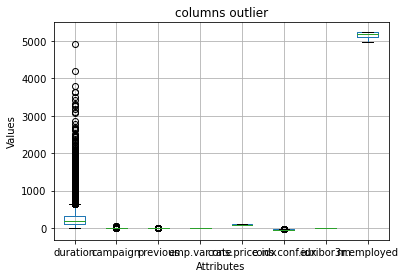

In [15]:
# Matplotlib을 사용하여 여러 개의 박스플롯 그리기
df.boxplot(column=['duration', 'campaign','previous',
                   'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])
plt.title('columns outlier')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.show()

### 3.4 컬럼 간 상관계수 확인 - df

heatmap을 이용한 컬럼 간의 상관계수를 확인해보았다.    
target 'y'와의 변수(컬럼) 간의 상관계수들이 대체로 낮게 나타났으며, 'duration', 'call', 'previous' ,'emp.var.rate', 'euribor3m',
'nr.employed' 컬럼 만이 0.3이상의 상관계수를 갖는 것으로 확인되었다.  
따라서 Accuracy를 높이기 위해, 0.3이하의 상관계수를 갖는 컬럼들을 제거하는 것을 하나의 방법으로 고려할 수 있을 것으로 판단된다.

Text(0.5, 1.0, 'correlation heatmap - df')

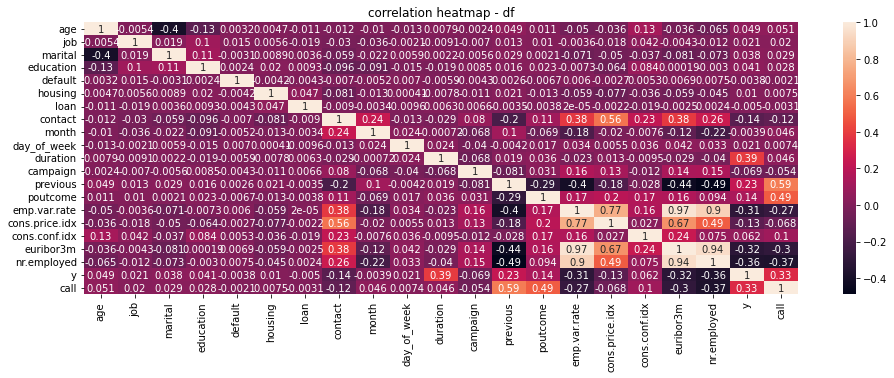

In [16]:
dfcorr = df.corr()
plt.figure(figsize=(16,5))
sns.heatmap(data = dfcorr, annot=True)
plt.title('correlation heatmap - df')

### 3.5 Data preprocessing(결론)

#### 1. 모든 컬럼 사용 -> 7
#### 2. 불필요한 컬럼 제거 -> 7.1
= 'duration', 'call' ,'emp.var.rate', 'euribor3m','nr.employed'을 제외한 나머지 컬럼 제거(target과의 낮은 상관계수를 갖는 컬럼제거)

# 4. Split data into separate training and test set

training, test data의 비율은 8:2로 나누었다.

In [17]:
training_points = df.drop(columns='y')
training_labels = df['y']

X_train, X_test, y_train, y_test = train_test_split(training_points,
                                                    training_labels,
                                                    test_size=0.2,
                                                    random_state=4)

# 5. Training model(Fit K Neighbours Classifier)

다음은 각각 Naive bayes(Gaussian NB) Classifier, SVC, K Neighbors Classifier 모델을 학습시키고, test data(X_test)에 대해 Target을 예측하는 과정이다.  

### 5.1 Naive bayes(Gaussian NB) Classifier

수치형 자료의 분류를 위해, NB Classifier 중 Gaussian NB Classifier를 사용하였으며, NB_guesses는 X_test에 대한 target의 예측 값을 나타낸다.

In [18]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
NB_guesses = classifier.predict(X_test)
print(NB_guesses)

[0 1 1 ... 0 0 0]


### 5.2 SVC

데이터가 속한 군집을 분류하기 위해, 사용할 커널(kernel)을 linear로 설정하였으며, SVC_guesses는 X_test에 대한 target의 예측 값을 나타낸다.

In [19]:
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)
SVC_guesses = classifier.predict(X_test)
print(SVC_guesses)

[0 0 0 ... 0 0 0]


### 5.3 Knn Classifier

데이터가 속한 군집을 분류하기 위해 고려할 데이터(n_neighbors)를 1개로 설정하였으며, Knn_guesses는 X_test에 대한 target의 예측 값을 나타낸다.

In [20]:
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, y_train)
Knn_guesses = classifier.predict(X_test)
print(Knn_guesses)

[0 0 0 ... 0 0 0]


# 6. Checking out Accuracy

모델의 학습 성능을 판단하기 위한 평가 지표는 Acurracy를 사용하였다.  
Accuracy는 모델이 test 데이터의 실제 target과 예측 target 간의 정답의 수를 통해 계산되며, 올바른 예측 target / 전체 target 수로 표현된다. 

### 6.1 NB classifier's Accuracy(Gaussian NB classifier's Accuracy)

Gaussian NB classifier의 경우, 전체 예측된 타겟 6098개 중 4574개, 471개가 '0', '1'를 정확하게 예측하였음을 알 수 있다.  
따라서 Acurracy는 약 0.83으로 나타났다.

In [21]:
print(confusion_matrix(y_test, NB_guesses))
print('Acurracy : ', metrics.accuracy_score(y_test, NB_guesses))

[[4574  773]
 [ 280  471]]
Acurracy :  0.8273204329288292


### 6.2 SVC's Accuracy

SVC의 경우, 전체 예측된 타겟 6098개 중 5185개, 249개가 '0', '1'를 정확하게 예측하였음을 알 수 있다.  
따라서 Acurracy는 약 0.89로 나타났다.

In [22]:
print(confusion_matrix(y_test, SVC_guesses))
print('Acurracy : ', metrics.accuracy_score(y_test, SVC_guesses))

[[5185  162]
 [ 502  249]]
Acurracy :  0.8911118399475237


### 6.3 Knn classifier's Accuracy

knn classifier의 경우, 전체 예측된 타겟 6098개 중 4977개, 350개가 '0', '1'를 정확하게 예측하였음을 알 수 있다.  
따라서 Acurracy는 약 0.87로 나타났다.

In [23]:
print(confusion_matrix(y_test, Knn_guesses))
print('Acurracy : ', metrics.accuracy_score(y_test, Knn_guesses))

[[4977  370]
 [ 401  350]]
Acurracy :  0.8735651033125615


# 7. KNN Improving Accuracy: Tuning k parameter 

다음은 데이터가 속한 군집을 분류하기 위해 고려할 데이터(n_neighbors) 수에 따른 Acurracy의 변화로, 1 ~ 50의 범위를 고려한 결과이다.    Acurracy가 약 0.901로 가장 높게 나타났음을 알 수 있다.

[0.874, 0.888, 0.888, 0.893, 0.891, 0.893, 0.895, 0.895, 0.894, 0.897, 0.897, 0.896, 0.898, 0.897, 0.9, 0.898, 0.9, 0.898, 0.9, 0.899, 0.9, 0.898, 0.9, 0.898, 0.901, 0.899, 0.9, 0.899, 0.899, 0.899, 0.9, 0.9, 0.901, 0.901, 0.901, 0.901, 0.9, 0.901, 0.9, 0.901, 0.901, 0.901, 0.901, 0.9, 0.9, 0.9, 0.899, 0.9, 0.9]


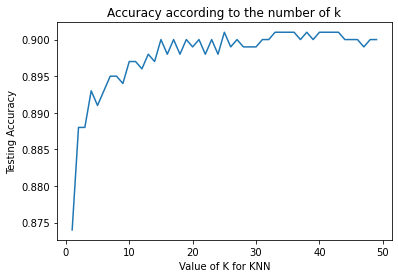

In [24]:
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses).round(3))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.title('Accuracy according to the number of k')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

# 7.1 Improving Accuracy : 불필요한 컬럼제거

3.6의 상관계수 heatmap에서 target과 'duration', 'call' ,'emp.var.rate', 'euribor3m','nr.employed 컬럼이 0.3 이상의 상관계수(0.39, -0.31, -0.32, -0.36, 0.33)를 갖는 것을 알 수 있었다. 따라서 모델의 성능 향상을 위해 'duration', 'call' ,'emp.var.rate', 'euribor3m','nr.employed 컬럼만을 training data에 사용하였다.

### 7.1.1 Split data into separate training and test set

In [25]:
training_points = df[[ 'duration', 'call','emp.var.rate', 'euribor3m','nr.employed']]
training_labels = df['y']

X_train, X_test, y_train, y_test = train_test_split(training_points,
                                                    training_labels,
                                                    test_size=0.2,
                                                    random_state=4)

### 7.1.2 Training model(Fit K Neighbours Classifier)

#### - NB classifier's Accuracy(Gaussian NB classifier's Accuracy)

0.3 이상의 상관계수를 갖는 컬럼을 이용하였을 때, Gaussian NB classifier의 정확도가 약 0.88으로 확연히 높아졌음을 확인할 수 있다.

In [26]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
NB_guesses = classifier.predict(X_test)
print(confusion_matrix(y_test, guesses))
print('Acurracy : ', metrics.accuracy_score(y_test, NB_guesses))

[[5108  239]
 [ 370  381]]
Acurracy :  0.8817645129550672


#### - SVC's Accuracy

SVC의 정확도는 약 0.89로 이전과 차이가 없는 정확도를 확인할 수 있다.

In [27]:
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)
SVC_guesses = classifier.predict(X_test)
print(confusion_matrix(y_test, guesses))
print('Acurracy : ', metrics.accuracy_score(y_test, SVC_guesses))

[[5108  239]
 [ 370  381]]
Acurracy :  0.8896359462118727


#### -Knn classifier's Accuracy

KNN classifier의 정확도는 약 0.87로 이전과 차이가 없는 정확도를 확인할 수 있다.

In [30]:
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, y_train)
print(confusion_matrix(y_test, Knn_guesses))
print('Acurracy : ', metrics.accuracy_score(y_test, Knn_guesses))

[[4977  370]
 [ 401  350]]
Acurracy :  0.8735651033125615


### 7.1.3 Checking out Knn classifier's Accuracy

다음은 'duration', 'call' ,'emp.var.rate', 'euribor3m','nr.employed' 컬럼만을 학습한 모델의 Acurracy를 나타내는 그래프이다.
기존의 최대 Acurracy값과 동일하게, Acurracy가 약 0.901로 가장 높게 나타났음을 알 수 있다.

[0.873, 0.888, 0.886, 0.893, 0.89, 0.893, 0.895, 0.896, 0.899, 0.896, 0.899, 0.897, 0.898, 0.898, 0.9, 0.899, 0.9, 0.899, 0.9, 0.899, 0.9, 0.899, 0.9, 0.901, 0.9, 0.9, 0.9, 0.898, 0.898, 0.899, 0.899, 0.9, 0.899, 0.899, 0.9, 0.899, 0.9, 0.899, 0.899, 0.899, 0.898, 0.899, 0.899, 0.899, 0.9, 0.901, 0.901, 0.9, 0.901]


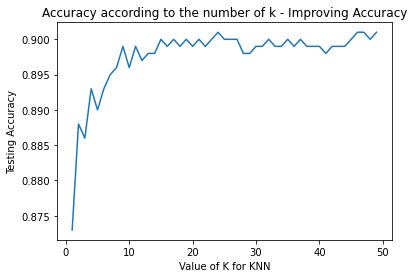

In [29]:
 k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses).round(3))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.title('Accuracy according to the number of k - Improving Accuracy')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()